In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from functools import reduce

In [2]:
df = pd.read_csv('E:\Me\gsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.dropna(inplace=True)
df = df[df['Year'] != 2017]
df = df[df['Year'] != 2020]

In [7]:
df['Year'] = df['Year'].astype(int)

In [8]:
df_0515 = df.loc[(df['Year']>=2005)&(df['Year']<=2015)]

In [9]:
df['Genre'].value_counts()

Action          3250
Sports          2304
Misc            1686
Role-Playing    1468
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       847
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

Text(0.5, 1.0, 'What genre games have been made the most?')

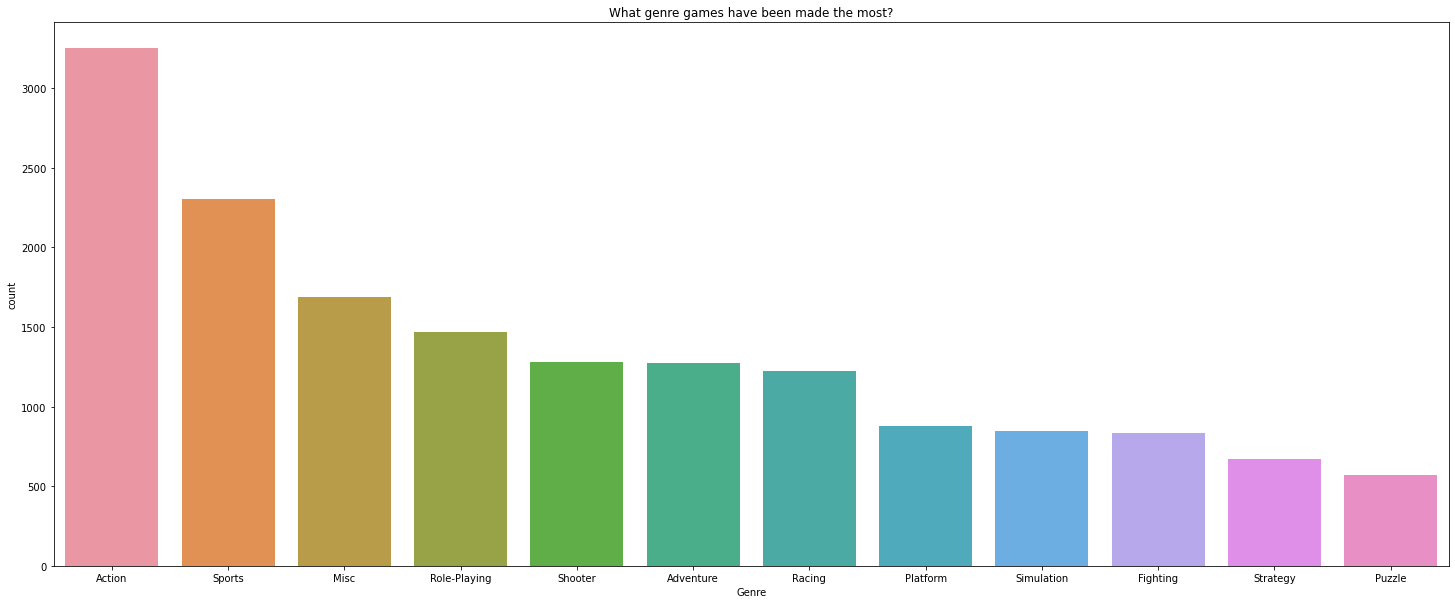

In [10]:
plt.figure(figsize=(25,10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.title('What genre games have been made the most?')

Text(0.5, 1.0, 'Which year had the most game release?')

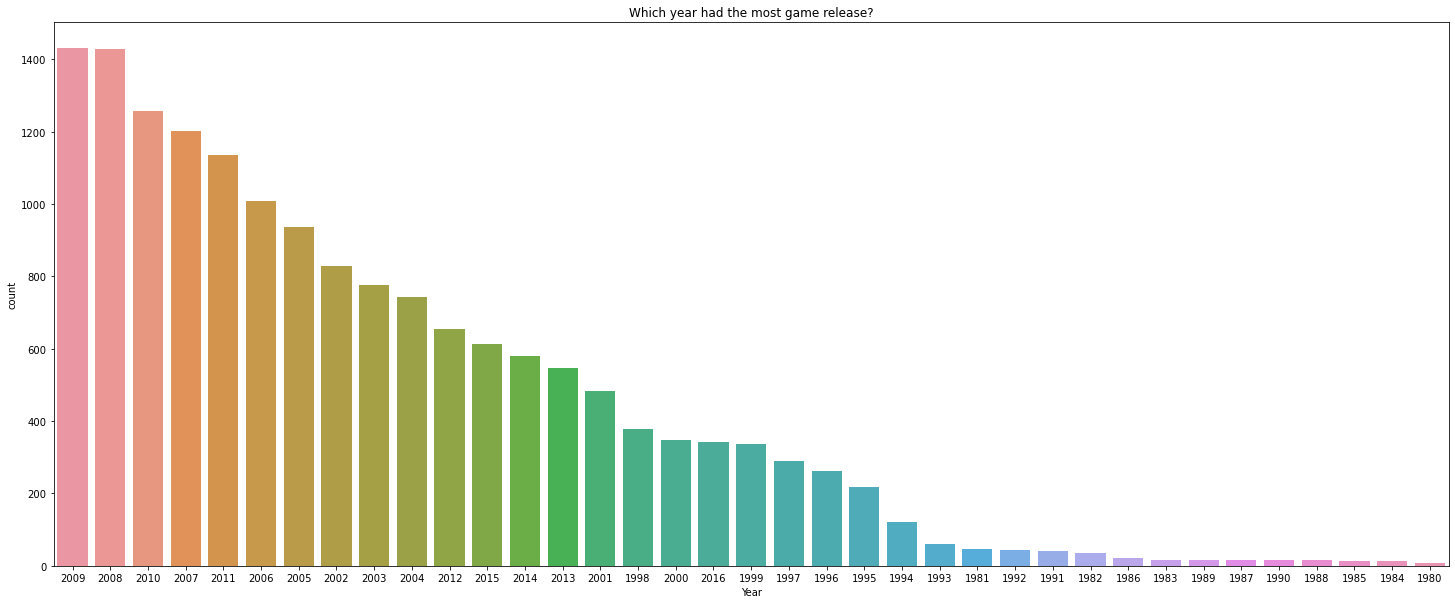

In [11]:
plt.figure(figsize=(25, 10))
sns.countplot(x="Year", data=df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.title('Which year had the most game release?')

Text(0.5, 1.0, 'Number of game by each genre by year')

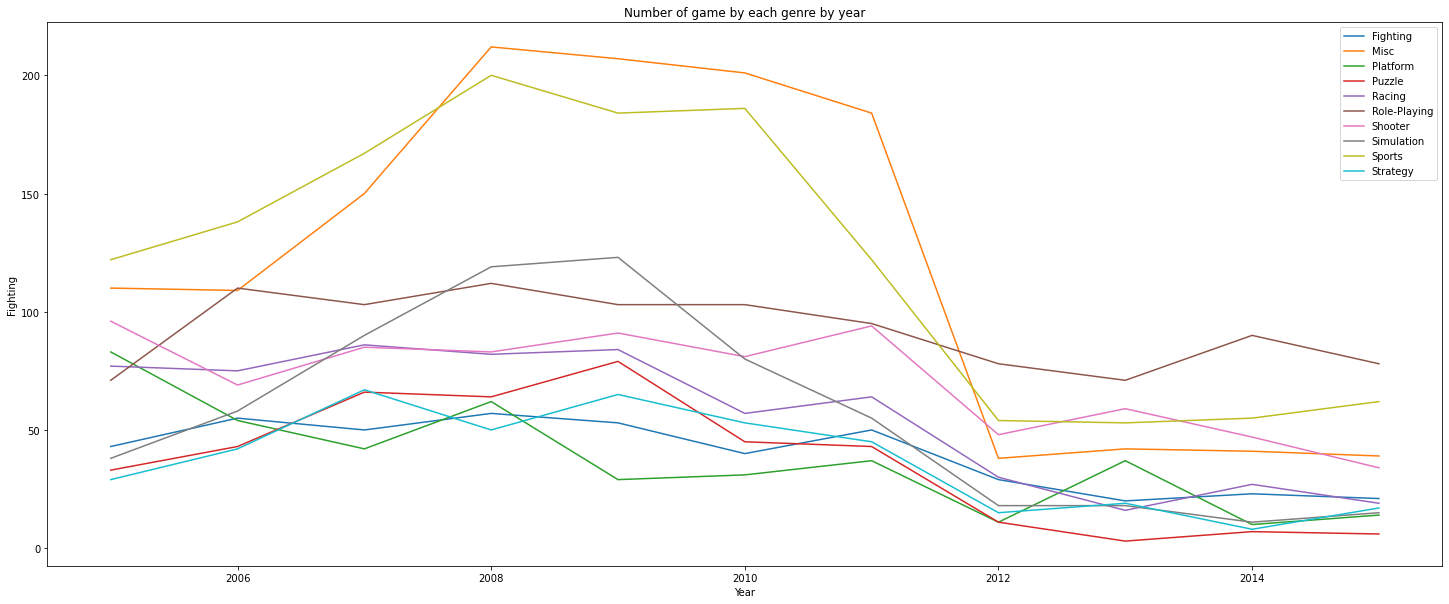

In [12]:
df1 = pd.DataFrame(df_0515.groupby('Year')['Genre'].value_counts().unstack())
df1.reset_index()
plt.figure(figsize=(25, 10))
for x in df1.columns[2:]:
    sns.lineplot(data=df1,x='Year',y=x)
plt.legend(df1.columns[2:])
plt.title('Number of game by each genre by year')

Text(0.5, 1.0, 'Hightest worldwide sale by year')

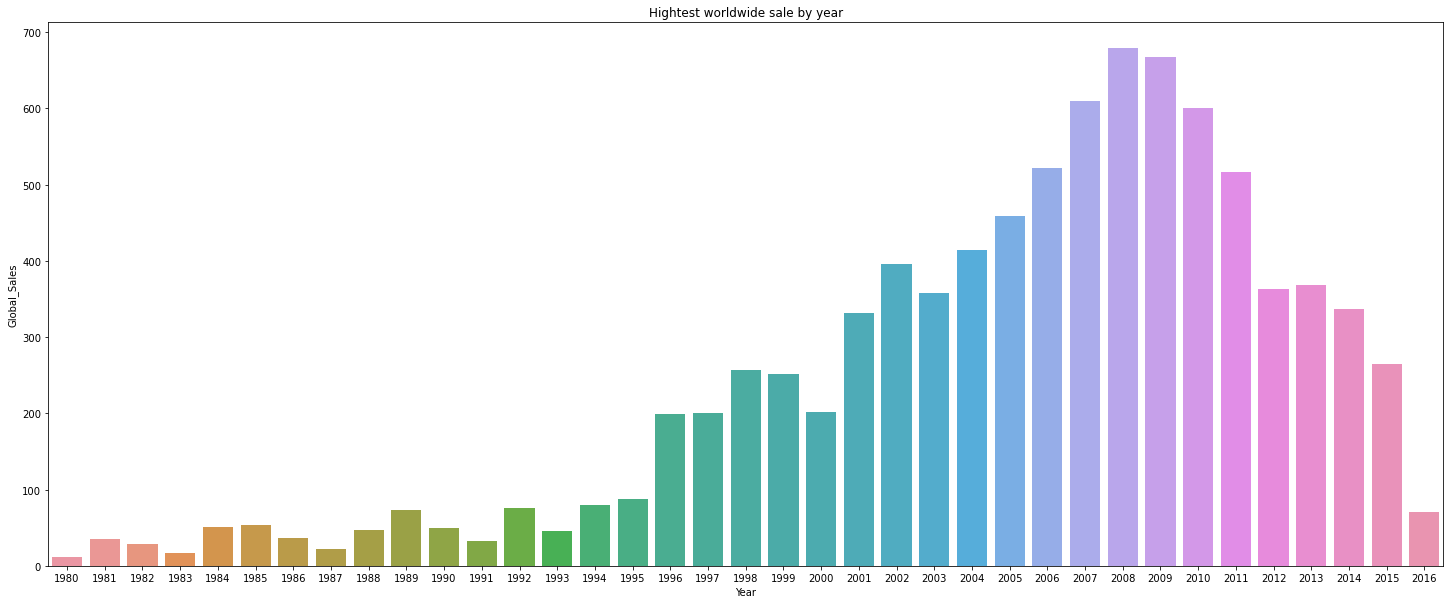

In [13]:
plt.figure(figsize=(25, 10))
data_year = df.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.title('Hightest worldwide sale by year')

Text(0.5, 1.0, 'Highest sale price platform worldwide')

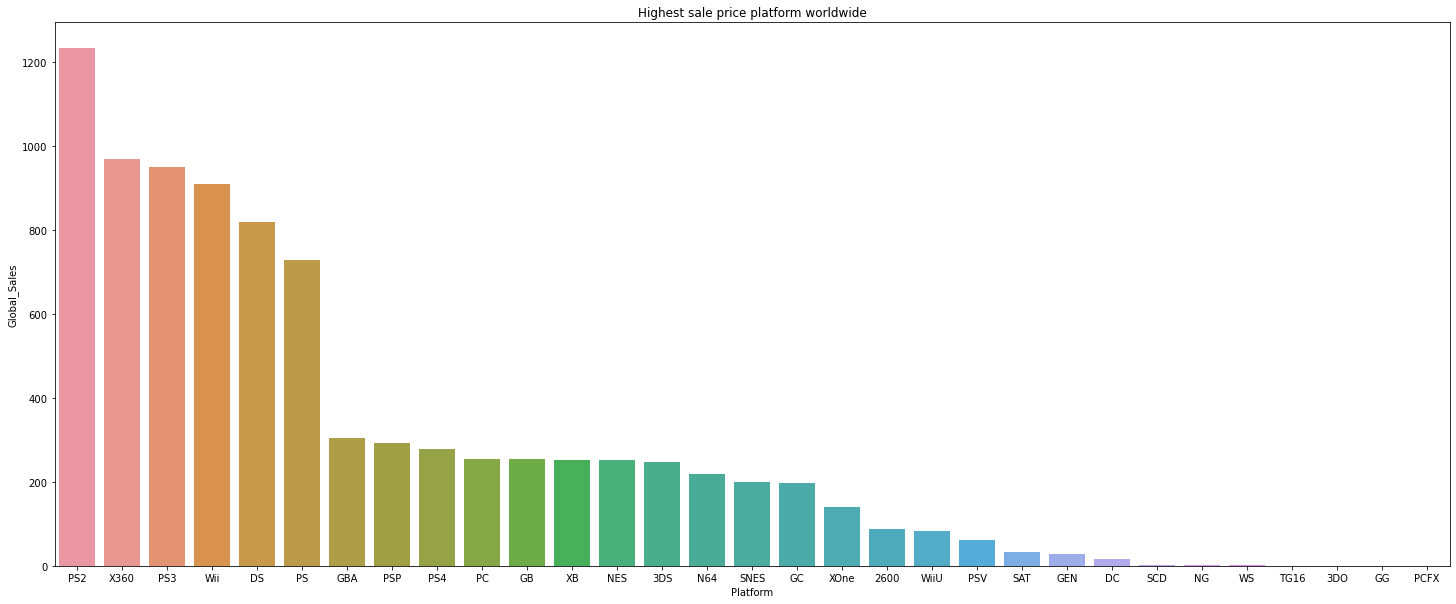

In [14]:
data_platform = df.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(25, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.title('Highest sale price platform worldwide')

Text(0.5, 1.0, 'Top 20 highest worldwide sale game')

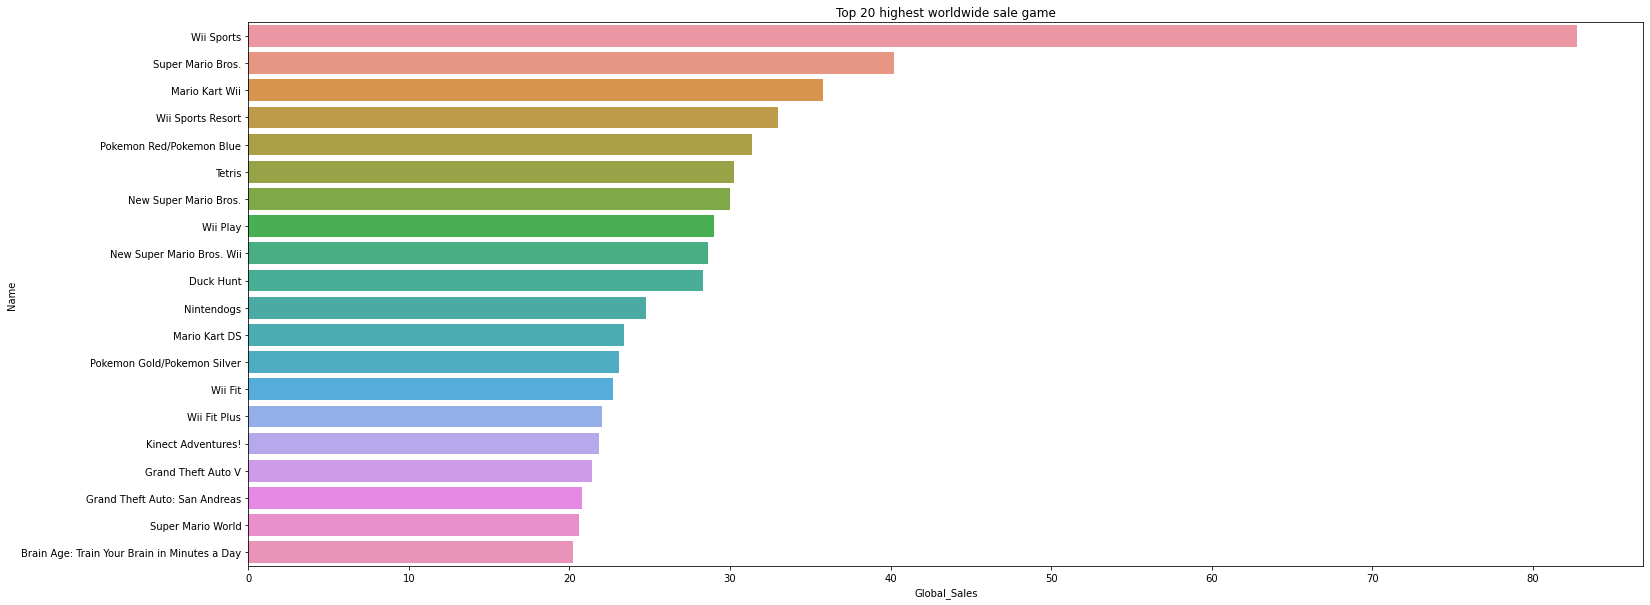

In [15]:
top_game_sale = df[['Name', 'Year', 'Genre', 'Global_Sales']].sort_values(by=['Global_Sales'], ascending=False)[:20]
plt.figure(figsize=(25, 10))
sns.barplot(y='Name', x='Global_Sales', data=top_game_sale,orient='h')
plt.title('Top 20 highest worldwide sale game')

Text(0.5, 1.0, 'Number of game by each genre by year')

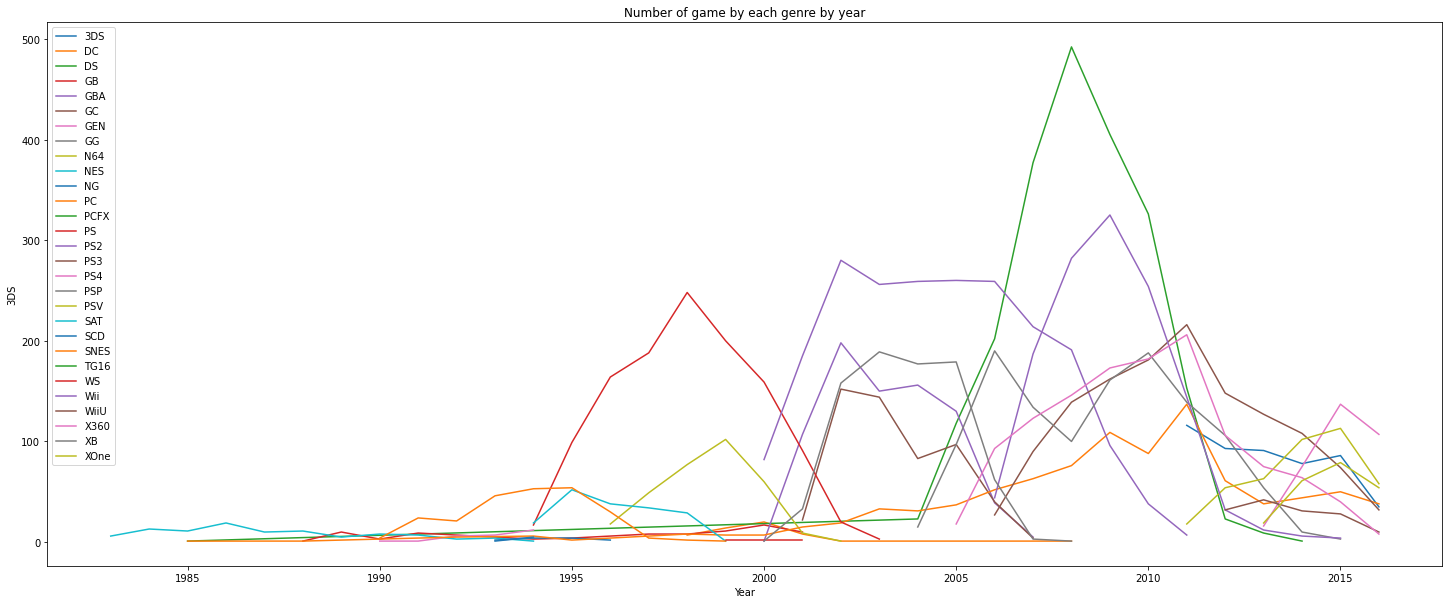

In [16]:
df_platform = pd.DataFrame(df.groupby('Year')['Platform'].value_counts().unstack())
df_platform.reset_index()
plt.figure(figsize=(25, 10))
for x in df_platform.columns[2:]:
    sns.lineplot(data=df_platform,x='Year',y=x)
plt.legend(df_platform.columns[2:])
plt.title('Number of game by each genre by year')

Text(0.5, 1.0, 'Top 10 Publishers')

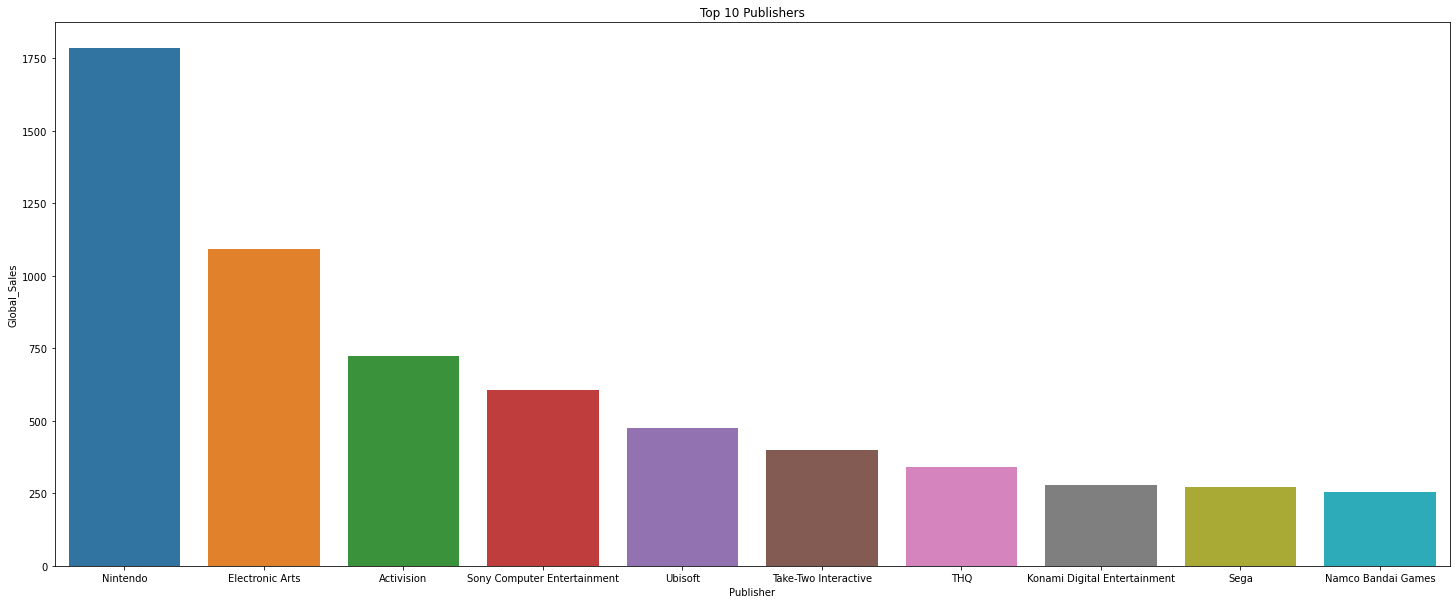

In [17]:
sale_pbl = df[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
plt.figure(figsize=(25, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.title('Top 10 Publishers')

Text(0.5, 1.0, 'Top 10 Publishers global sales by year')

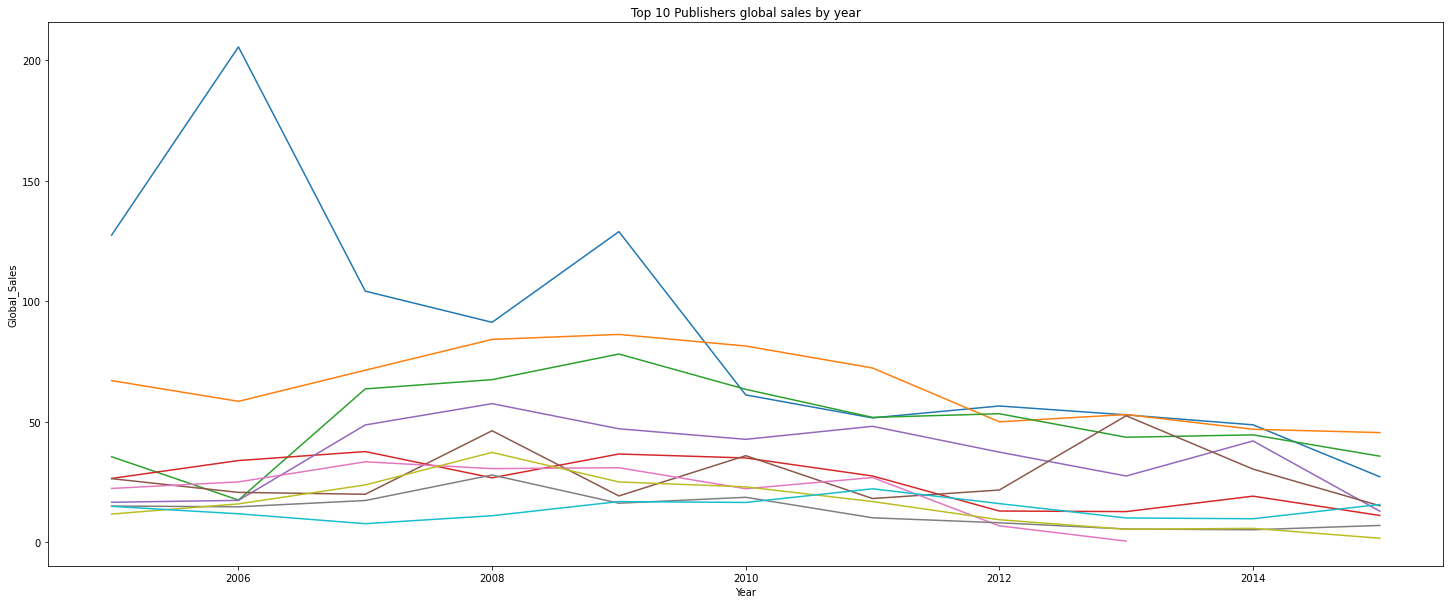

In [18]:
top_10_Publisher = sale_pbl['Publisher'].unique()
df2 = pd.DataFrame(df_0515.groupby(['Year','Publisher'])['Global_Sales'].sum())
df2 = df2.reset_index()
plt.figure(figsize=(25, 10))
for x in top_10_Publisher:
    sns.lineplot(x=df2['Year'],y=df2['Global_Sales'].where(df2['Publisher']==x))
plt.title('Top 10 Publishers global sales by year')

In [19]:
comp_publisher = df_0515[['Year','Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].loc[(df['Year']>2010)]
comp_publisher

,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16,2013,Take-Two Interactive,7.01,9.27,0.97,4.14
23,2013,Take-Two Interactive,9.63,5.31,0.06,1.38
29,2011,Activision,9.03,4.28,0.13,1.32
32,2013,Nintendo,5.17,4.05,4.34,0.79
33,2015,Activision,5.77,5.81,0.35,2.31
...,...,...,...,...,...,...
16567,2014,Namco Bandai Games,0.00,0.00,0.01,0.00
16571,2013,Prototype,0.00,0.00,0.01,0.00
16578,2011,Mastiff,0.01,0.00,0.00,0.00
16581,2011,Unknown,0.00,0.01,0.00,0.00


In [20]:
sum_NA = pd.DataFrame(comp_publisher.groupby(['Publisher'])['NA_Sales'].sum()).reset_index()
sum_EU = pd.DataFrame(comp_publisher.groupby(['Publisher'])['EU_Sales'].sum()).reset_index()
sum_JP = pd.DataFrame(comp_publisher.groupby(['Publisher'])['JP_Sales'].sum()).reset_index()
sum_Other = pd.DataFrame(comp_publisher.groupby(['Publisher'])['Other_Sales'].sum()).reset_index()
dfs = [sum_NA, sum_EU, sum_JP, sum_Other]
df3 = reduce(lambda left,right: pd.merge(left,right,on='Publisher'), dfs)
df3 = df3.reset_index(drop=True)
df3 = df3[df3['Publisher'].isin(top_10_Publisher)]

In [21]:
df3.index = [1,2,3,4,5,6,7,8,9,10]
df3.set_index('Publisher')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
Activision,117.09,80.82,3.27,27.28
Electronic Arts,112.83,115.25,3.31,35.83
Konami Digital Entertainment,9.48,10.89,11.48,3.43
Namco Bandai Games,16.87,15.55,35.66,5.01
Nintendo,87.34,63.42,71.07,14.73
Sega,10.15,16.17,7.94,4.27
Sony Computer Entertainment,35.67,30.04,4.58,12.58
THQ,18.54,10.95,0.52,3.75
Take-Two Interactive,72.63,44.92,2.27,17.48


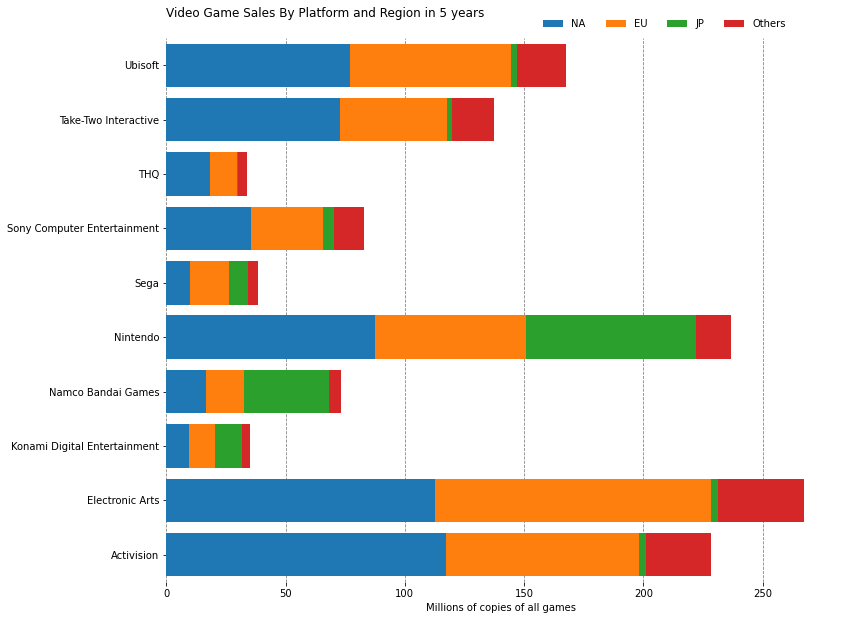

In [22]:
fields = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
labels = ['NA', 'EU', 'JP', 'Others']
fig, ax = plt.subplots(1, figsize=(12, 10))
df4 = df3.set_index('Publisher')
left = len(df4) * [0]
for idx, name in enumerate(fields):
    plt.barh(df4.index, df4[name], left = left)
    left = left + df4[name]
plt.title('Video Game Sales By Platform and Region in 5 years\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Millions of copies of all games')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

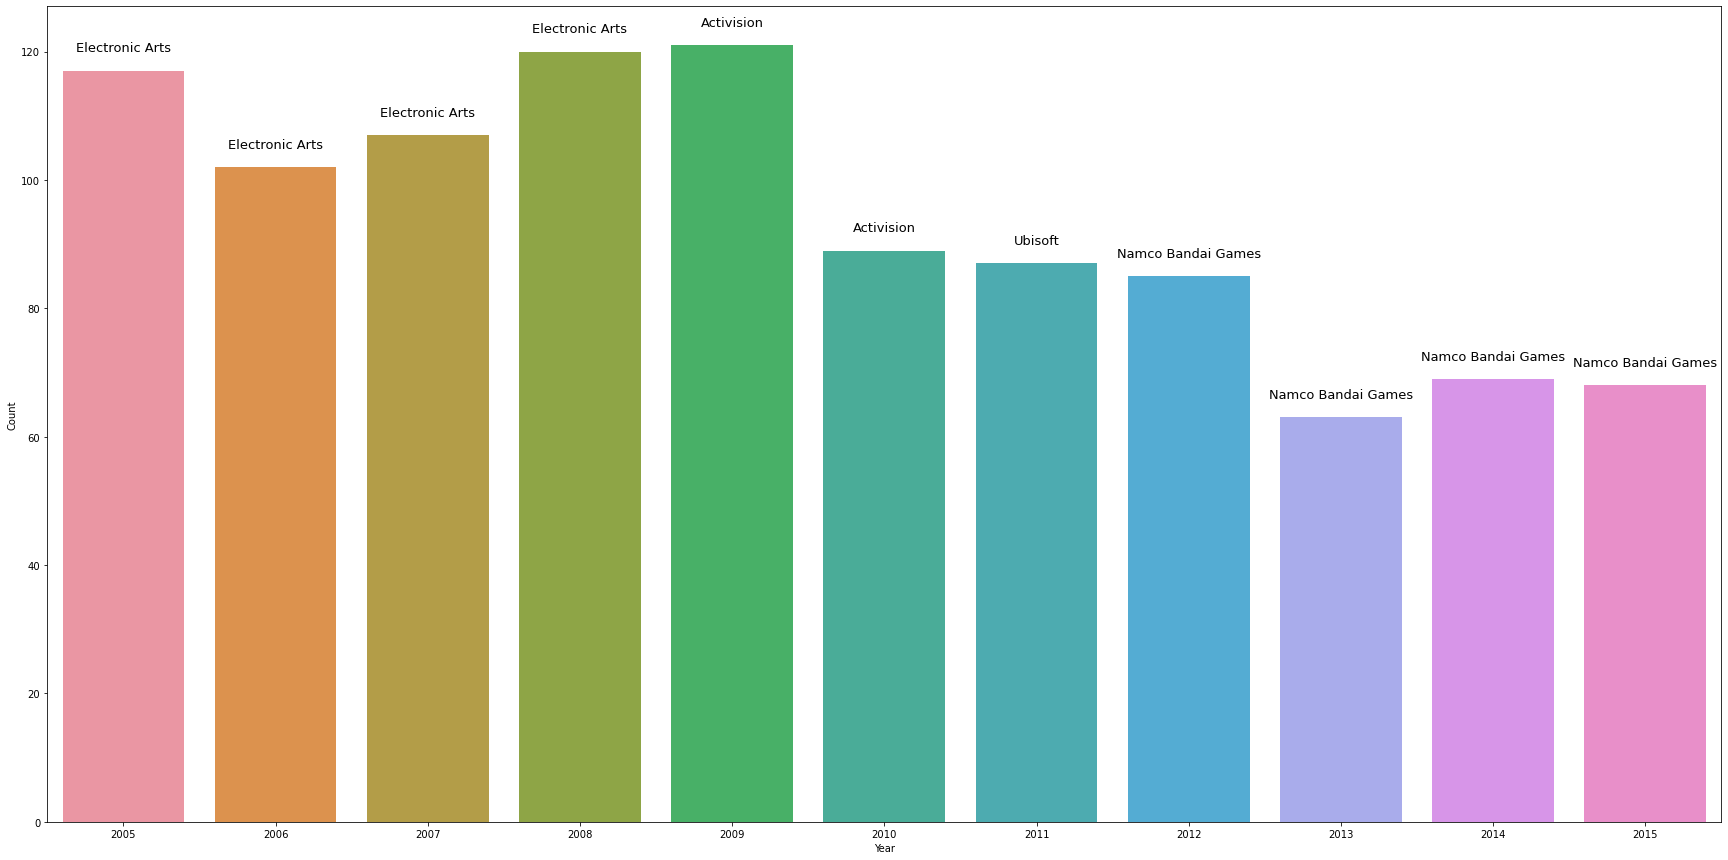

Text(0.5, 1.0, 'Top publisher by year')

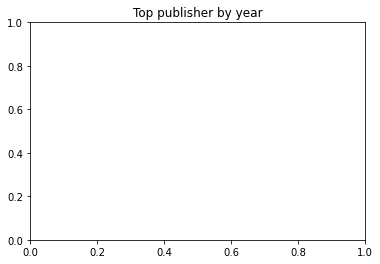

In [23]:
top_publisher =  df_0515[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
publisher= top_publisher_count['Publisher']
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
    g.text(index, value + 3 , str(publisher[index]), color='#000', size=13, ha="center")
    index += 1
plt.show()
plt.title('Top publisher by year')